# Numpy and Pandas

## Numpy 

Numpy works mostly with arrays, much like Matlab and R.

Here I'll briefly show some of the functionality of Numpy.

In [ ]:
import numpy as np

#### Creating arrays

In [ ]:
np.ones(2)

In [ ]:
np.zeros(3)

In [ ]:
np.identity(3)

In [ ]:
np.diagonal(np.identity(3))

In [ ]:
np.arange(2,10,2) #(start, stop, step)

In [ ]:
np.linspace(2,8,10) #(start, stop, number of elements)

Nested lists make a matrix:

In [ ]:
m = np.array([[1,2,3],
              [4,5,6],
              [7,8,9]])
m

Slicing works the same way as lists, but with two indices instead of one:

In [ ]:
m

In [ ]:
m[:2,:2]

#### Linear Algebra Operations

In [ ]:
I = np.identity(3)/2
I

In [ ]:
np.linalg.inv(I)

In [ ]:
np.trace(I)

In [ ]:
np.linalg.eigvals(I)

### Warning: Copying in Numpy
What is the difference between these two blocks?

In [ ]:
m = np.arange(1,10,1).reshape(3,3)
m1 = m
m1[0,1] = 0
m

In [ ]:
m = np.arange(1,10,1).reshape(3,3)
m2 = np.copy(m)
m2[0,1] = 0
m

### Important thing about Arrays:
When creating a subset of the array like m1, it is a __view__ and __not a copy__.

This means if you edit it, it will actually edit the original one.

Basic numpy practice is to use "np.copy" to create a new version that you can edit without affecting the underlying array.

Also edits it if you assign values to a slice.

In [ ]:
ex = m[2]
ex

In [ ]:
ex = m[2]
ex[0] = 0
m

### Random Number Generation
In our last example, I prespecified a list. The way I made that list was using numpy functions.



In [ ]:
np.random.randn(100) # This generates 100 draws from N(0,1)

Instead of using for loops, we can do matrix calculations.

In [ ]:
X = np.random.randn(100,1)
e = np.random.randn(100,1)

Y = 2*X + e
Y[:10]

Numpy could estimate the linear regression parameter two different ways:
- Matrix way.
- Numerical way.

#### The matrix way. 

What's the formula?



$\beta = (X'X)^{-1}(X'Y)$

In [ ]:
from numpy.linalg import inv as inverse # Renamed the function

XX_inv = inverse(X.T@X) # (X'X)^{-1}
                        # @ = matrix multiplication
XY = X.T@Y              # (X'Y)
beta_hat = XX_inv@XY  
beta_hat

Easy as that!

#### The numerical way

I'll use the SSE function we used before, but instead of using a for loop to determine things I will use:
- Matrix operations to find SSE
- A list comprehension to calculate SSE for different $\beta$
- The function "np.argmin" to find the array element with the smallest value.

In [ ]:
def sse(beta,X,Y):
    sse_array = ((Y- X*beta)**2) # * = element by element multiplication
    sse = sse_array.sum() # Sum the array
    return sse

beta_grid = [-1,0,1,2,3,4] # Choose some candidates for beta

sse_vals = np.array([sse(b,X,Y) for b in beta_grid]) # List comprehension!

beta_grid[np.argmin(sse_vals)] # argmin tells me the index 
                               # for the element of the array with the smallest value

and __voila!__ We can do linear regression with numpy arrays either numerically or with the matrix formula.

### Some other Numpy things that you will find to be useful
- Indexing arrays:
    - Just like lists, you can use slices like `array[::2]`
    - Or pass Boolean vectors to subset: `array[array<2]`
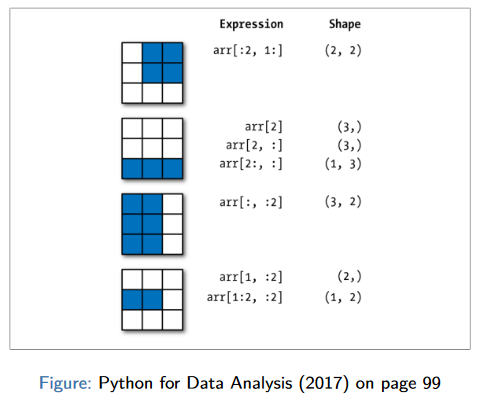
<center>from PyEcon slideshow, slide 118: https://pyecon.org/down/pyecon.pdf </center>


- Concatenating arrays:
    - As long as the dimensions align, you can concatenate by specifying "axis": `np.concatenate([arr1,arr2],axis=0)`
    - Cheat sheet: `axis=0` is the __row axis__, `axis=1` is the __column axis__.

In [ ]:
np.concatenate([m,m],axis=1)

In [ ]:
np.concatenate([m,m],axis=0)

## Pandas

The two main objects of Pandas:

- `pd.Series()`, which is only one dimension.
- `pd.DataFrame()`, which is two dimensions.

The functionality is similar to the dataframes in R.

What I love about DataFrames, however, is the number of built-in methods!

In [ ]:
import pandas as pd

In [ ]:
the_array = np.concatenate([X,Y],axis=1)
the_array[:10]

In [ ]:
df = pd.DataFrame(the_array,columns=['X','Y'])
df.head()

Pandas can also convert dictionaries to DataFrames very easily:

In [ ]:
Babies = {"Bart Harley Jarvis":{
                "Description" : "Underbite, flat back of the head",
                "Weight Percentile" : 50,
                "Height Percentile" : 80 },
          "Michael Patrick Porkins":{
                "Description" : "Button nose, apple cheeks",
                "Weight Percentile" : 99,
                "Height Percentile" : 10},
          "Taffy Lee Fubbins" : {
                "Description" : "Tuna can",
                "Weight Percentile" : 90,
                "Height Percentile" : 10}}

In [ ]:
pd.DataFrame(Babies)

Selecting one column returns a Series:

In [ ]:
df['X'].head()

Selecting more columns returns a DataFrame

In [ ]:
type(df[['X','Y']].head())

You can also pass slices just like in arrays, with one critical difference: Pandas indices are __labeled__.

Thus you need to tell Pandas whether you are giving it a label or a positional index.

- `.loc` is for labeled indices.
- `.iloc` is for positional indices (integer based).

In [ ]:
df.loc[0,"X"]

In [ ]:
df.iloc[0,"X"]

In [ ]:
df.loc[2,"X"]

In [ ]:
df.iloc[2,0]

### Indexing using Boolean arrays
When you pass a DataFrame a Boolean array, it subsets the data to the rows where the value is `True`

As long as you understand this, you can do subsetting __very__ easily in Pandas:

In [ ]:
# On axis 1
df.iloc[:,[True,False]].head()

In [ ]:
# On axis 0
df.iloc[[True,False]*50,[True,False]].head()

__What did I just do with the code  `df.iloc[[True,False]*50,:].head()`__?

Step by step:

`[True,False]` is a list with two booleans.


`[True,False]*50` is that array duplicated 50 times (total length 100) __(This shouldn't work in other languages)__

`df.iloc[[True,False]*50,:]` passed the 100 length list to the first axis (rows). This subsets the dataframe to be every other row.

`df.iloc[[True,False]*50,:].head()` returns the first 5 rows of the dataframe.

Writing good code, I would have spelled these steps out one by one instead of doing only one line and being lazy...

__Why is this useful?__

I can create a boolean Series just by applying a condition to a Series:

`df['X'] > 0`

I can feed this boolean array into the index:

In [ ]:
df[df['X']<0].head()

In [ ]:
df[(df['X']<0)]['X'].max()

By default, feeding it into brackets feeds it into the first axis.

But if I feed it a label, it also knows to first check whether this is a column.

This is part of why Python is easy to use, but also __easy to screw things up__.

### Methods
This is one of the reasons I got hooked on Python. Pandas DataFrames have several built-in methods that make data manipulation __very easy__.

Also, there are ways to easily apply your own functions to dataframes, which is good for data cleaning.

Some key ones:
- built in data frame methods
- `groupby()`
- `apply()` and `map()`

#### Stats functions.
All of the major moments:

In [ ]:
df.mean(), df.std(), df.var(), df.skew(), df.kurtosis()

Correlations:

In [ ]:
df.corr()

#### Sequential operations.
Such as differences and shifts:

In [ ]:
df['D_X'] = df['X'].diff()
df['L_X'] = df['X'].shift()

df.head()

Even random things like "percent change"

In [ ]:
df['X'].pct_change()

#### Useful data exploration ones:

In [ ]:
# How many non-null values are there?
df['D_X'].count()

In [ ]:
df['D_X_neg'] = df['D_X']<0
# How many unique values are there?
df['D_X_neg'].nunique()

In [ ]:
# How many occurences of each unique value?
df['D_X_neg'].value_counts()

In [ ]:
# What are those unique values?
df['D_X_neg'].unique()

In [ ]:
df.describe()

In [ ]:
df[['D_X_neg']].drop_duplicates()

#### Making quick plots:

In [ ]:
df['X'].plot(kind='hist',bins=20,color="C0")

In [ ]:
df.plot(kind='density',color=["C0","C2","C3"])

In [ ]:
df.plot(kind='scatter',x="X",y="Y")

#### Groupby

Ok, now for the really cool one: `groupby`

Groupby takes an argument that is a discrete variable and then applies whatever built in function you call to each group.

In [ ]:
df.groupby("D_X_neg").mean()

In [ ]:
df.groupby("D_X_neg").sum()

A really useful application is __panel data__. If you have individual $i$ in time $t$, you can produce first differences of any variable by writing:

`df = df.sort_values(["i","t"])`

`df.groupby('i')['var'].diff()`

The first statement is key, because the `diff` function takes the difference based on the order it comes in the dataframe. By putting it in order first, you can use `diff` or `shift` to produce differences or lags.

__Note:__ `diff` and `shift` take an argument, which is how many periods you want to shift or diff (order of the lag or difference)

#### Apply and map
Crucially, you can also use your own functions in the dataframe.

- Element by element functions.
- Group by group functions.

__map__ is for Series, whereas __apply__ is for dataframes.

Suppose I wanted to add the word "dog" to the end of every value of a column. We want to use map for this, and you must write the function as if it is receiving a scalar input.

In [ ]:
def add_dog(x):
    return str( round(x, 2) )+ "dog"

df['X'].map(add_dog)

#### Another aside: lambda functions

In python, these two things are equivalent:
- ` def add_dog(x): str( round(x,2) ) + "dog"`
- ` add_dog = lambda x: str( round(x,2) ) + "dog"`

The second is an example of a __lambda function__.

Example:

In [ ]:
add_cat = lambda x: str(x) + "cat"

add_cat("dog")

This a quicker way to write small functions very quickly.

Lambda functions can be made on the fly and are ideal for functions you don't want to use more than once. We can make one for this function and `map` will accept it:

In [ ]:
           # Lambda functions have this form: 
           #lambda var: then_write_your_function_of_var
df['X'].map(lambda x: str( round(x, 2) ) + "dog").head()

If we need a function that applies across an axis, that is when we need __apply__, and you must write the function as if it is receiving a column or row.

In [ ]:
def stringify(column):
    return column.astype(str).sum()

In [ ]:
df.apply(stringify,axis=1)

In [ ]:
df.apply(stringify,axis=0)

#### Group functions

Suppose we wanted to standardize a variable to mean 0 and standard deviation 1.

In [ ]:
df["Z"] = np.random.randn(100)*.2 +5

df['Z'].mean(), \
df['Z'].std()

Let's write a function that does that:

In [ ]:
def standardize(column):
    return ( column - column.mean() )  /  column.std()

In [ ]:
standardize(df['Z']).mean(),\
standardize(df['Z']).std()

__We can also do this operation group by group:__

In [ ]:
group_object = df.groupby("D_X_neg",group_keys=False)

df['Z_stdized_g'] = group_object['Z'].apply(standardize)

In [ ]:
df.groupby("D_X_neg")['Z_stdized_g'].mean()

Super handy for doing data cleaning procedures by groups.

### Another handy use of ".loc"
You can do a "find and replace" using .loc in your dataframe.

Suppose that you think all values of `X` below zero create mistakes in `Z`, and you want to replace values of `Z` with `NaN` if that is the case.

`.loc` allows you to do this kind of conditional replacement.

In [ ]:
df.loc[df['X']<0,"Z"] = np.nan
df.head(10)

__Now what just happened there?__

Step by step:
- Inside `.loc`, it evaluated a condition: `df['X']<0`, which created a Boolean vector.
- We fed that boolean vector into the "row" position, and gave it the label `Z` for the column vector.
- We then __assigned a value__ to this __view__ of the dataframe, which was the missing value object `NaN`

We saw before how changing views of the data can lead to issues, but this is a case where it's very useful.

Still, be careful...

In [ ]:
df_new = df

df_new['Z'] = df_new['Z'].fillna("Missing")

df.head()

It does __not do this__ when doing certain operations, however...

In [ ]:
df_head = df.head()

df_head['X'] = "all Garfield"

df.head()

__Why didn't it change every row of `X` to "all Garfield"?__

__The short answer:__ Operations in Pandas (e.g. `.head()`) __always__ create copies of DataFrames. Therefore we edited a totally new DataFrame.

Pandas sends us a `SettingWithCopyWarning` to inform us that we are not modifying the original DataFrame.

__The good part:__ You can test out edits before doing it to your main DataFrame. I do this sometimes when I'm not sure what a data cleaning process will do and my data takes a long time to read in.

__The bad part:__ if you create a lot of dataframes, you can eat up memory very quickly.

If we wanted to make the first five rows of X "all Garfield," we can use `.loc` instead:

In [ ]:
df.loc[:5,"X"] = "all Garfield"

df.head(7)

__Pandas almost never does "in place" operations unless you tell it to__.

An example is if you wanted to drop columns. The following code will generate an entirely new dataframe without the column.

In [ ]:
df.drop("D_X",axis=1)

In [ ]:
df.head()

So you must assign it back if that's the DataFrame you want.

In [ ]:
df = df.drop("D_X",axis=1).head()
df.head()

You can, however, specify that it does it "in place," meaning it will modify the object and not generate a new one.

In [ ]:
df.drop("L_X",axis=1,inplace=True)

In [ ]:
df.head()

### Data Merging in Pandas:
- `join` is for merging on indices; DataFrames must be the same size for this.
- `concat` is for concatenation like in Numpy.
- `merge` is for any of the above but includes many to one merges.
    - Instead of the "m:1" stuff Stata uses, it uses `left`, `right`, `outer` and `inner` (which comes from SQL).

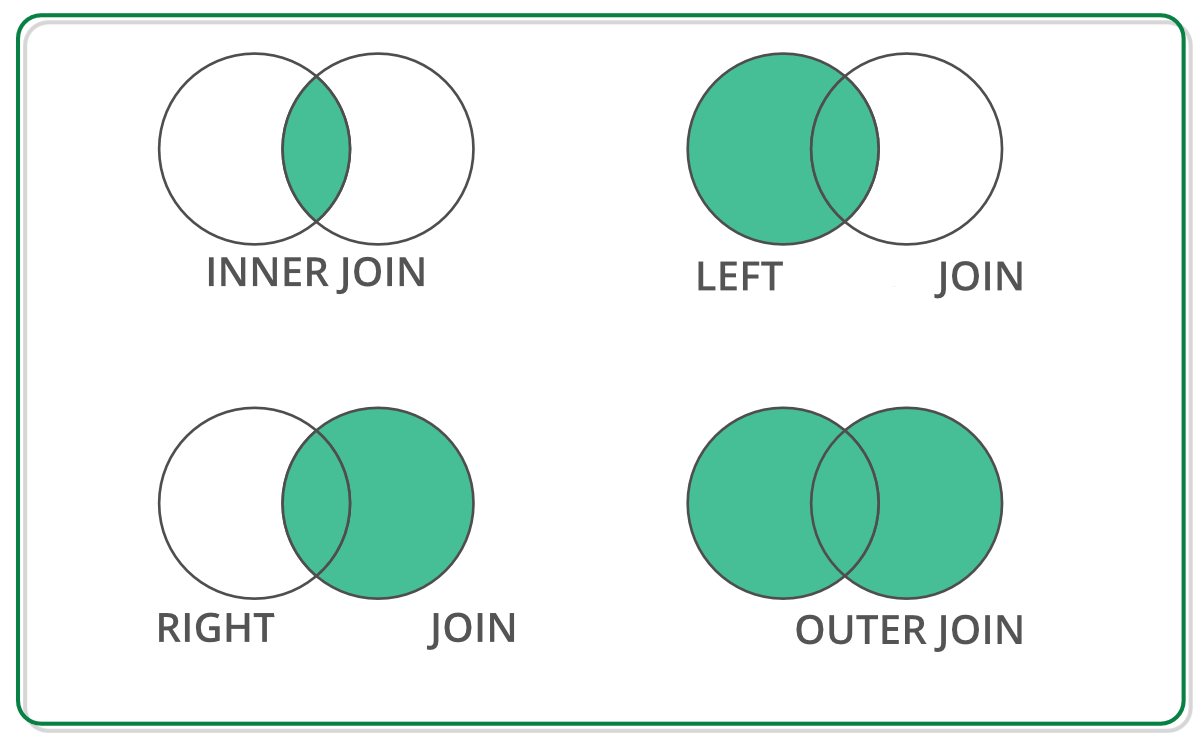


[Link to image](https://medium.com/swlh/merging-dataframes-with-pandas-pd-merge-7764c7e2d46d)

- inner: keep rows that match on the keys in __both__ dataframes.
- outer: keep __all__ rows __regardless__ of whether keys match.
- left: keep all rows in the right that match and all the left.
- right: inverse of left.

In [ ]:
df['Missing'] = df['Z'] == "Missing" # Make a boolean column for missing values in Z

Y_means = df.groupby("Missing")['Y'].mean() # Take the mean of Y by these two groups
Y_means = Y_means.reset_index() # Reset index so that "Missing appears"

df.merge(Y_means,on="Missing",how="left",suffixes=("","_mean"))

__What did this code just do?__

Step-by-step:
- `df['Missing'] = df['Z'] == "Missing"` created a column called "Missing" that is a Boolean vector.
- `Y_means = df.groupby("Missing")['Y'].mean().reset_index()`
    - Groupby the variable "Missing"
    - For the column Y, take the average for all levels of "Missing"


In [ ]:
df.groupby("Missing")['Y'].mean()

- Reset the index so that you have a DataFrame that looks like this:

In [ ]:
df.groupby("Missing")['Y'].mean().reset_index()

- `df.merge(Y_means,on="Missing",how="left",suffixes=("","_mean"))`
    - Do a left merge with the DataFrame I just created.
    - Merge on the variable "Missing."
    - When there are overlapping columns, give the one on in the "right" DataFrame the suffix "_mean"
    - The above option is because "Y" is in both DataFrames.

In [ ]:
df.merge(Y_means,on="Missing",how="left",suffixes=("","_mean"))

Another useful argument for `pd.merge()` is `indicator="string"`, which creates something like the Stata `_merge` variable.

In [ ]:
df.merge(Y_means,on="Missing",how="left",suffixes=("","_mean"),indicator="i")

Labeled "both" because the values of `Missing` are found in both DataFrames. If we had something else it would mess up:

In [ ]:
df.loc[df.Y>1,"Missing"] = "Not Missing"

In [ ]:
df

In [ ]:
df.merge(Y_means,on="Missing",how="left",suffixes=("","_mean"),indicator="_merge")

### Reading data in to Pandas.
In addition to converting from dictionaries and arrays, Pandas reads from almost every file format.
- `pd.read_csv` for .csv files.
- `pd.read_html` for .html files (we will use this when doing scraping).
- `pd.read_stata` for Stata data files.
- `pd.read_json` for .json files (we will use this when retreiving API data).

### Pandas vs. Stata
- In Stata, there is __only one dataframe in memory at a time__. In Pandas these are objects and there can be as many in memory as you can hold.
- Everything you do in Stata is "in place." In Pandas this will __only happen if you specify it__.
- When merging or joining, Pandas needs both DataFrames read into memory; this can be an issue if they are very big and requires you to use "chunking" or other work arounds.

For other questions comparing pandas and Stata, I recommend consulting [this link](http://www.danielmsullivan.com/pages/tutorial_stata_to_python.html)

If you want to compare to R, [consult this link](https://towardsdatascience.com/cheat-sheet-for-python-dataframe-r-dataframe-syntax-conversions-450f656b44ca)